# **Coding Task 1 | Algorithms 2023 | EC31205**
#### Submitted by Irsh Vijay | 21EC30025
****
### **Question 2: Smarter Robot Navigation Problem**
Please run the following code cells in succession and provide input parameters in the fifth cell.

The function is called in the sixth cell.

**For Input:**
```
maze = [[1, 1, 1, 1, 1],
[1, 0, 0, 0, 1],
[1, 0, 1, 1, 1],
[0, 1, 1, 1, 1]]

start = (0, 0)

end = (3, 2)

all_direction = False
```

**Expected Output:**<br><br>
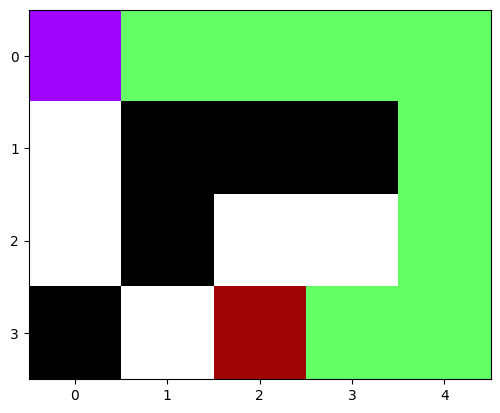

(True,
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 4),
  (2, 4),
  (3, 4),
  (3, 3),
  (3, 2)], 11.0)

In [1]:
import matplotlib.pyplot as plt

# A plot maze function to visualise the path taken

def plot_maze(maze, start = False, end = False, path = False):
  rows = len(maze)
  cols = len(maze[0])

  grid = [[(255, 255, 255) if maze[row][col] == 1 else (0, 0, 0) for col in range(cols)] for row in range(rows)]

  if start:
    grid[start[0]][start[1]] = (160, 4, 252)
  if end:
    grid[end[0]][end[1]] = (160, 4, 4)
  if path:
    for path_row, path_col in path:
      if(grid[path_row][path_col] != (160, 4, 252) and grid[path_row][path_col] != (160, 4, 4)):
        grid[path_row][path_col] = (100, 255, 100)

  plt.imshow(grid)
  plt.xticks(range(cols))
  plt.yticks(range(rows))
  plt.show()

In [2]:
def check_valid_move(maze, row, col, all_direction):
  return 0 <= row < len(maze) and 0 <= col < len(maze[0]) and maze[row][col] == 1

In [3]:
import math

def directional_cost(prev_direction, direction):
    # Calculate the directional cost based on the change in direction
    ang_prev =  math.atan2(prev_direction[1], prev_direction[0])/math.pi*180
    ang_new =  math.atan2(direction[1], direction[0])/math.pi*180
    if ang_prev == ang_new:
        return 0.0  # No turn
    elif abs(ang_prev - ang_new)==45 or abs(ang_prev - ang_new)==135:
        return 0.5  # 45-degree turn
    else:
        return 1.0  # 90-degree turn

In [26]:
import numpy as np
import heapq

def smarter_robot_navigation(maze, start, end, all_direction):
    allowed_directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    if all_direction:
        allowed_directions.extend([(1, 1), (-1, 1), (1, -1), (-1, -1)])

    visited = set()
    cost_map = {}
    queue = [(0, start, [], (None, None))]

    while queue:
        current_cost, (row, col), path, prev_direction = heapq.heappop(queue)

        if (row, col) == end:
            plot_maze(maze, start, end, path + [(row, col)])
            total_cost = calculate_total_cost(path)
            return True, path + [(row, col)], total_cost

        if (row, col) in visited:
            continue

        visited.add((row, col))

        for dr, dc in allowed_directions:
            new_row, new_col = row + dr, col + dc
            new_direction = (dr, dc)

            if check_valid_move(maze, new_row, new_col, all_direction):
                if prev_direction[0] == None:
                    step_cost = 0.0
                else:
                    step_cost = directional_cost(prev_direction, new_direction)
                new_cost = current_cost + step_cost
                heapq.heappush(queue, (new_cost, (new_row, new_col), path + [(row, col)], new_direction))
    return False, [], 'inf'

def calculate_total_cost(path):
    total_cost = len(path)
    for i in range(len(path) - 2):
        intermediate_cost = directional_cost(
            np.subtract(path[i], path[i + 1]), np.subtract(path[i + 1], path[i + 2])
        )
        total_cost += intermediate_cost
    return total_cost

In [33]:
maze = [[1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1],
[1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0],
[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
[0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
[1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1],
[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1],
[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
[1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
[0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1],
[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1],
[0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1],
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
[1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0],
[1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1],
[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1],
[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1],
[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1],
[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]]

start = (0, 0)

end = (29, 29)

all_direction = True

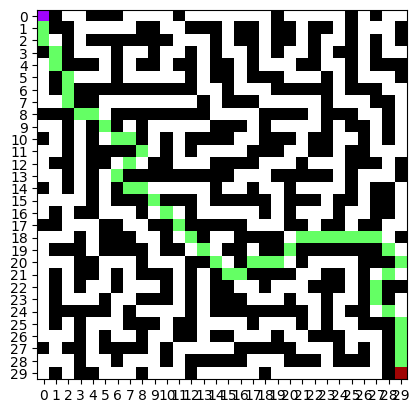

(True,
 [(0, 0),
  (1, 0),
  (2, 0),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 2),
  (7, 2),
  (8, 3),
  (8, 4),
  (9, 5),
  (10, 6),
  (10, 7),
  (11, 8),
  (12, 7),
  (13, 6),
  (14, 7),
  (14, 8),
  (15, 9),
  (16, 10),
  (17, 11),
  (18, 12),
  (19, 13),
  (20, 14),
  (21, 15),
  (21, 16),
  (20, 17),
  (20, 18),
  (20, 19),
  (19, 20),
  (18, 21),
  (18, 22),
  (18, 23),
  (18, 24),
  (18, 25),
  (18, 26),
  (18, 27),
  (19, 28),
  (20, 29),
  (21, 28),
  (22, 27),
  (23, 27),
  (24, 28),
  (25, 29),
  (26, 29),
  (27, 29),
  (28, 29),
  (29, 29)],
 63.5)

In [34]:
smarter_robot_navigation(maze, start, end, all_direction)